In [136]:
import numpy as np
import pandas as pd
import random

from copy import deepcopy
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [137]:
# Reading the data 📖
unnormalized_data = pd.read_csv("clustering_points.csv")

# Normalizing data with sklearn
unnormalized_data = unnormalized_data.sample(frac=1).reset_index(drop=True)
scaler = preprocessing.MinMaxScaler()
col_names = unnormalized_data.columns
df = scaler.fit_transform(unnormalized_data)
data = pd.DataFrame(df, columns=col_names)

data_for_testing = deepcopy(data)
data_for_testing

,Ft1,Ft2,Cluster
0,0.174835,0.090719,1.0
1,0.427365,0.807006,0.0
2,0.437825,0.863970,0.0
3,0.777850,0.421688,0.5
4,0.146796,0.081257,1.0
...,...,...,...
395,0.444803,0.785507,0.0
396,0.753566,0.411015,0.5
397,0.099508,0.148681,1.0
398,0.852010,0.573686,0.5


In [138]:
# The main code is below 👇

In [139]:
class ClusteringWithFOREL:
    def __init__(self, data, r):
        self.data = data
        self.r = r
        
    def distance(self, center, point):
        # Calculating distance between center and point 
        return ((center[0] - point[0])**2 + (center[1] - point[1])**2) ** (1/2)
    
    def mean(self, x_points, y_points):
        # Calculating the coordinates of the center of gravity of certain internal points
        return sum(x_points)/len(x_points), sum(y_points)/len(y_points)
    
    def points_in_radius(self, center, r):
        # Finding the points the distance to which is lower than the radius
        points = []
        for i in range(len(self.data.index)):
            distance_from_center = self.distance(center, (self.data.iloc[i, 0], self.data.iloc[i, 1]))
            if distance_from_center <= r:
                points.append((self.data.iloc[i, 0], self.data.iloc[i, 1], i))
        return points
    
    def ForelAlgorithm(self):
        center = self.mean(tuple(self.data.iloc[:,0]), tuple(self.data.iloc[:,1]))
        points = self.points_in_radius(center, self.r)
        new_center = (0,0)

        while new_center != center:
            center = new_center
            self.r *= 0.9
            new_center = random.choice(points)
            points = self.points_in_radius(new_center, self.r)
            # Shifting the center of the sphere to the centre of gravity 🎯
            new_center = self.mean([i[0] for i in points], [i[1] for i in points])
            
        # When the compostion of inner points, and, subsequently, their center of gravity, will become established
        return points
    
    def clustering(self):
        clusters = []
        
        # The procedure is repeating 🔁 until inclusion of all points into clusters 
        
        while len(self.data.index):
            cluster = self.ForelAlgorithm()
            for i in cluster:
                self.data.drop(i[2], inplace = True, axis = 0)
            self.data.reset_index(drop = True,inplace=True)
            print(self.data)
            print("✔️")
            clusters.append(cluster)
            
        return clusters

In [140]:
test = ClusteringWithFOREL(data_for_testing, r)
clusters = test.clustering()

          Ft1       Ft2  Cluster
0    0.174835  0.090719      1.0
1    0.777850  0.421688      0.5
2    0.146796  0.081257      1.0
3    0.762009  0.495216      0.5
4    0.813205  0.530676      0.5
..        ...       ...      ...
261  0.787730  0.464537      0.5
262  0.753566  0.411015      0.5
263  0.099508  0.148681      1.0
264  0.852010  0.573686      0.5
265  0.297344  0.106582      1.0

[266 rows x 3 columns]
✔️
          Ft1       Ft2  Cluster
0    0.174835  0.090719      1.0
1    0.146796  0.081257      1.0
2    0.124723  0.065252      1.0
3    0.177391  0.073191      1.0
4    0.171634  0.042553      1.0
..        ...       ...      ...
128  0.154038  0.075949      1.0
129  0.222382  0.068674      1.0
130  0.156997  0.177044      1.0
131  0.099508  0.148681      1.0
132  0.297344  0.106582      1.0

[133 rows x 3 columns]
✔️
Empty DataFrame
Columns: [Ft1, Ft2, Cluster]
Index: []
✔️


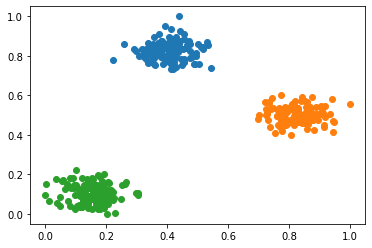

In [141]:
for j in range(len(clusters)):
    plt.scatter([i[0] for i in clusters[j] ],[i[1] for i in clusters[j]])
plt.show()